# 🧠 Stocks Sentiment Analysis Using AI

This project performs sentiment analysis on stock-related text data using deep learning.

🔧 Key Steps:

Data Loading & Preprocessing: Loaded stock headlines/tweets with sentiment labels. Cleaned and tokenized the text.

Tokenization & Padding: Converted text to sequences using Keras Tokenizer and applied padding to equalize input length.

Model Architecture: Built a sequential deep learning model with:

Embedding layer

LSTM layer

Dense output layer with softmax activation for classification

Training & Validation: Trained the model using categorical cross-entropy and evaluated performance with a validation_split=0.2.

Evaluation & Prediction: Evaluated model accuracy and loss, and made predictions on new stock headlines.


### 📦 Libraries Used

- `pandas`
- `numpy`
- `matplotlib`
- `seaborn`
- `sklearn.preprocessing` (`LabelEncoder`)
- `keras.preprocessing.text` (`Tokenizer`)
- `keras.utils` (`pad_sequences`, `to_categorical`)
- `keras.models` (`Sequential`)
- `keras.layers` (`Embedding`, `LSTM`, `Dense`)


In [76]:
!pip install nltk

In [77]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [78]:
# import key libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import nltk
import re
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
import plotly.express as px

# Tensorflow
import tensorflow as tf
from tensorflow.keras.preprocessing.text import one_hot,Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Embedding, Input, LSTM, Conv1D, MaxPool1D, Bidirectional, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical

In [79]:
# install nltk
# NLTK: Natural Language tool kit
!pip install nltk

In [80]:
# install gensim
# Gensim is an open-source library for unsupervised topic modeling and natural language processing
# Gensim is implemented in Python and Cython.
!pip install gensim

In [81]:
# load the stock news data
stock_df = pd.read_csv("stock_sentiment.csv")

stock_df.head()

,Text,Sentiment
0,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,1
1,user: AAP MOVIE. 55% return for the FEA/GEED i...,1
2,user I'd be afraid to short AMZN - they are lo...,1
3,MNTA Over 12.00,1
4,OI Over 21.37,1


In [82]:
#Dataframe information

stock_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5791 entries, 0 to 5790
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Text       5791 non-null   object
 1   Sentiment  5791 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 90.6+ KB


In [83]:
stock_df.describe()

,Sentiment
count,5791.000000
mean,0.636332
std,0.481096
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


In [84]:
# check for null values
stock_df.isnull().sum()

Text         0
Sentiment    0
dtype: int64

In [85]:
#unique elements are present in the 'sentiment' column

stock_df['Sentiment'].nunique()

2

<Axes: xlabel='Sentiment', ylabel='count'>

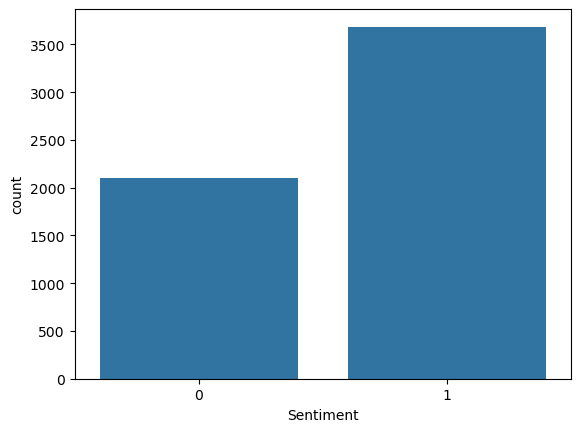

In [86]:
sns.countplot(x='Sentiment', data=stock_df)

**PERFORM DATA CLEANING (REMOVE PUNCTUATIONS FROM TEXT)**



In [87]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [88]:
Test = "$I love AI & Machine Learning!!!"

Test_punc_removed = [char   for char in Test if char not in string.punctuation  ]

Test_punc_removed

['I',
 ' ',
 'l',
 'o',
 'v',
 'e',
 ' ',
 'A',
 'I',
 ' ',
 ' ',
 'M',
 'a',
 'c',
 'h',
 'i',
 'n',
 'e',
 ' ',
 'L',
 'e',
 'a',
 'r',
 'n',
 'i',
 'n',
 'g']

In [89]:
# Join the characters again to form the string.

type(Test_punc_removed)


list

In [90]:
Test_punc_removed_join = ''.join(Test_punc_removed)

Test_punc_removed_join

'I love AI  Machine Learning'

In [91]:
# Let's define a function to remove punctuations
def remove(punc):
    punc_removed = [char        for char in punc if char not in string.punctuation]
    punc_removed_join = ''.join(punc_removed)
    return punc_removed_join

In [92]:
# Let's remove punctuations from our dataset

stock_df['Text Without Punctuation'] = stock_df['Text'].apply(remove)

In [93]:
stock_df['Text Without Punctuation']

0       Kickers on my watchlist XIDE TIT SOQ PNK CPW B...
1       user AAP MOVIE 55 return for the FEAGEED indic...
2       user Id be afraid to short AMZN  they are look...
3                                        MNTA Over 1200  
4                                         OI  Over 2137  
                              ...                        
5786    Industry body CII said discoms are likely to s...
5787    Gold prices slip below Rs 46000 as investors b...
5788    Workers at Bajaj Auto have agreed to a 10 wage...
5789    Sharemarket LIVE Sensex off day’s high up 600 ...
5790    Sensex Nifty climb off days highs still up 2 K...
Name: Text Without Punctuation, Length: 5791, dtype: object

In [94]:
stock_df

,Text,Sentiment,Text Without Punctuation
0,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,1,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...
1,user: AAP MOVIE. 55% return for the FEA/GEED i...,1,user AAP MOVIE 55 return for the FEAGEED indic...
2,user I'd be afraid to short AMZN - they are lo...,1,user Id be afraid to short AMZN they are look...
3,MNTA Over 12.00,1,MNTA Over 1200
4,OI Over 21.37,1,OI Over 2137
...,...,...,...
5786,Industry body CII said #discoms are likely to ...,0,Industry body CII said discoms are likely to s...
5787,"#Gold prices slip below Rs 46,000 as #investor...",0,Gold prices slip below Rs 46000 as investors b...
5788,Workers at Bajaj Auto have agreed to a 10% wag...,1,Workers at Bajaj Auto have agreed to a 10 wage...
5789,"#Sharemarket LIVE: Sensex off day’s high, up 6...",1,Sharemarket LIVE Sensex off day’s high up 600 ...


**Remove punctuations using a different method**

In [95]:
Test_sent = "My name is ##Shuchi!!!"

In [96]:
char_list = []

for char in Test_sent:
    if char not in string.punctuation:
        char_list.append(char)
print(char_list)

['M', 'y', ' ', 'n', 'a', 'm', 'e', ' ', 'i', 's', ' ', 'S', 'h', 'u', 'c', 'h', 'i']


In [97]:
type(char_list)

list

In [98]:
final_sent = ''.join(char_list)

final_sent

'My name is Shuchi'

# PERFORM DATA CLEANING (REMOVE STOPWORDS)

In [99]:
# download stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Shuchi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [100]:
stopwords.words('english')

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [101]:
# Obtain additional stopwords from nltk
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

stop_words.extend(['from', 'subject', 're', 'edu', 'use','will','aap','co','day','user','stock','today','week','year', 'https'])


In [102]:
# Remove stopwords and remove short words (less than 2 characters)
def remove_stopwords(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in stop_words and len(token) >=2:
            result.append(token)
    
           
    return result
    
            


In [103]:
# apply pre-processing to the text column

stock_df['Text without punctuation and stopwords'] = stock_df['Text Without Punctuation'].apply(remove_stopwords)

In [104]:
stock_df

,Text,Sentiment,Text Without Punctuation,Text without punctuation and stopwords
0,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,1,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,"[kickers, watchlist, xide, tit, soq, pnk, cpw,..."
1,user: AAP MOVIE. 55% return for the FEA/GEED i...,1,user AAP MOVIE 55 return for the FEAGEED indic...,"[movie, return, feageed, indicator, trades, aw..."
2,user I'd be afraid to short AMZN - they are lo...,1,user Id be afraid to short AMZN they are look...,"[id, afraid, short, amzn, looking, like, nearm..."
3,MNTA Over 12.00,1,MNTA Over 1200,[mnta]
4,OI Over 21.37,1,OI Over 2137,[oi]
...,...,...,...,...
5786,Industry body CII said #discoms are likely to ...,0,Industry body CII said discoms are likely to s...,"[industry, body, cii, said, discoms, likely, s..."
5787,"#Gold prices slip below Rs 46,000 as #investor...",0,Gold prices slip below Rs 46000 as investors b...,"[gold, prices, slip, rs, investors, book, prof..."
5788,Workers at Bajaj Auto have agreed to a 10% wag...,1,Workers at Bajaj Auto have agreed to a 10 wage...,"[workers, bajaj, auto, agreed, wage, cut, peri..."
5789,"#Sharemarket LIVE: Sensex off day’s high, up 6...",1,Sharemarket LIVE Sensex off day’s high up 600 ...,"[sharemarket, live, sensex, high, points, nift..."


In [105]:
stock_df['Text'][1]

'user: AAP MOVIE. 55% return for the FEA/GEED indicator just 15 trades for the year.  AWESOME.  '

In [106]:
stock_df['Text without punctuation and stopwords'][1]

['movie', 'return', 'feageed', 'indicator', 'trades', 'awesome']

In [107]:
# join the words into a string
# stock_df['Processed Text 2'] = stock_df['Processed Text 2'].apply(lambda x: " ".join(x))

# PLOT WORDCLOUD

A word cloud, also known as a text cloud or tag cloud, is a visual representation of text data. It displays words used in a text, with the size of each word reflecting its frequency or importance. Essentially, the more a word appears in the text, the larger and more prominent it will be in the cloud. 

In [108]:
stock_df['Text without punctuation and stopwords joined'] = stock_df['Text without punctuation and stopwords'].apply(lambda x: ' '.join(x))

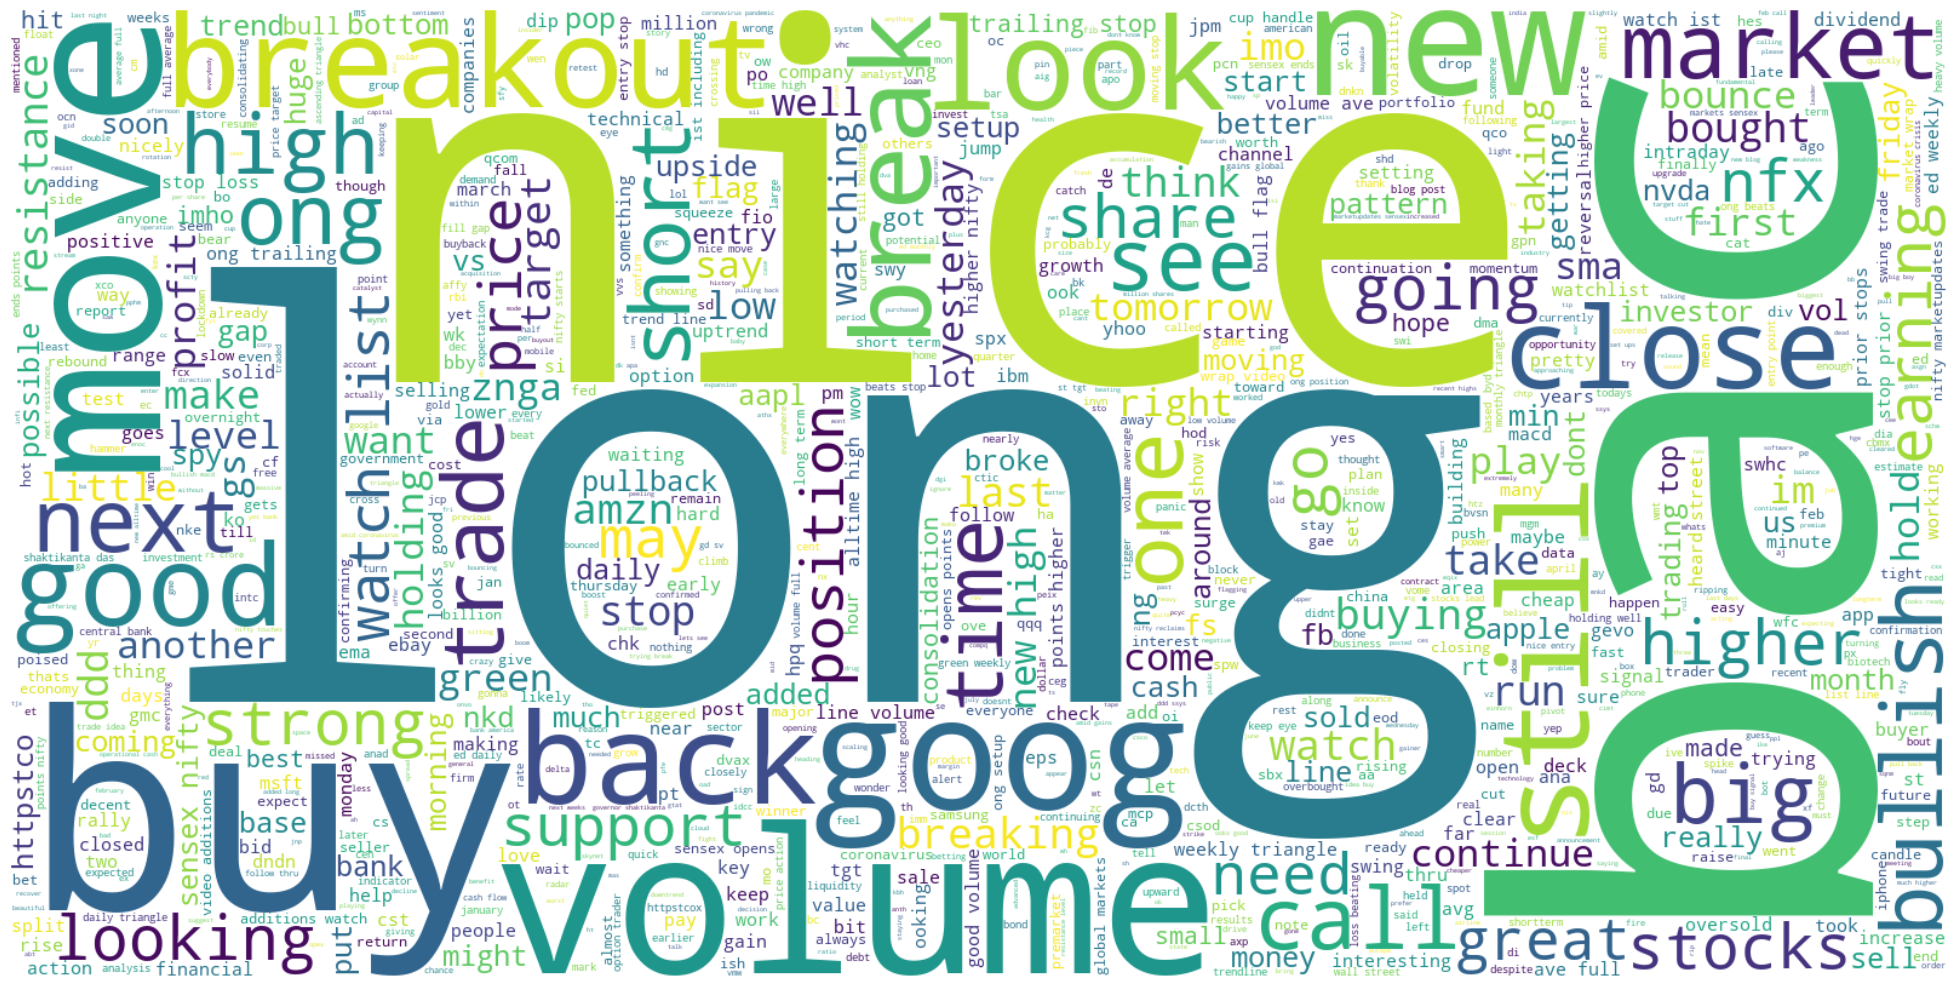

In [109]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Ensure there's a space between joined words
text = " ".join(stock_df[stock_df['Sentiment'] == 1]['Text without punctuation and stopwords joined'].dropna())

# Check if the resulting text is not empty
if text.strip():
    plt.figure(figsize=(25, 25))
    wc = WordCloud(max_words=1000, width=1600, height=800, background_color='white').generate(text)
    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
    plt.show()
else:
    print("No text available to generate the word cloud.")



- **Visualize the wordcloud for tweets that have negative sentiment**

In [110]:
# Join the text for negative sentiment tweets with a space between words
negative_text = " ".join(stock_df[stock_df['Sentiment'] == -1]['Text without punctuation and stopwords joined'].dropna())

# Plot only if there's valid text
if negative_text.strip():
    plt.figure(figsize=(25, 25))
    wc = WordCloud(max_words=1000, width=1600, height=800, background_color='white').generate(negative_text)
    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
    plt.title("Word Cloud for Negative Sentiment Tweets", fontsize=20)
    plt.show()
else:
    print("No negative sentiment text found to generate the word cloud.")


No negative sentiment text found to generate the word cloud.


# VISUALIZE CLEANED DATASETS

In [111]:
stock_df

,Text,Sentiment,Text Without Punctuation,Text without punctuation and stopwords,Text without punctuation and stopwords joined
0,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,1,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,"[kickers, watchlist, xide, tit, soq, pnk, cpw,...",kickers watchlist xide tit soq pnk cpw bpz aj ...
1,user: AAP MOVIE. 55% return for the FEA/GEED i...,1,user AAP MOVIE 55 return for the FEAGEED indic...,"[movie, return, feageed, indicator, trades, aw...",movie return feageed indicator trades awesome
2,user I'd be afraid to short AMZN - they are lo...,1,user Id be afraid to short AMZN they are look...,"[id, afraid, short, amzn, looking, like, nearm...",id afraid short amzn looking like nearmonopoly...
3,MNTA Over 12.00,1,MNTA Over 1200,[mnta],mnta
4,OI Over 21.37,1,OI Over 2137,[oi],oi
...,...,...,...,...,...
5786,Industry body CII said #discoms are likely to ...,0,Industry body CII said discoms are likely to s...,"[industry, body, cii, said, discoms, likely, s...",industry body cii said discoms likely suffer n...
5787,"#Gold prices slip below Rs 46,000 as #investor...",0,Gold prices slip below Rs 46000 as investors b...,"[gold, prices, slip, rs, investors, book, prof...",gold prices slip rs investors book profits ami...
5788,Workers at Bajaj Auto have agreed to a 10% wag...,1,Workers at Bajaj Auto have agreed to a 10 wage...,"[workers, bajaj, auto, agreed, wage, cut, peri...",workers bajaj auto agreed wage cut period apri...
5789,"#Sharemarket LIVE: Sensex off day’s high, up 6...",1,Sharemarket LIVE Sensex off day’s high up 600 ...,"[sharemarket, live, sensex, high, points, nift...",sharemarket live sensex high points nifty test...


Tokenization is the process of breaking down a text string into individual units, usually words or subwords (called tokens), so that they can be analyzed computationally.

In [112]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Shuchi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [113]:
# word_tokenize is used to break up a string into words
print(stock_df['Text without punctuation and stopwords joined'][0])

print(nltk.word_tokenize(stock_df['Text without punctuation and stopwords joined'][0]))


kickers watchlist xide tit soq pnk cpw bpz aj trade method method see prev posts
['kickers', 'watchlist', 'xide', 'tit', 'soq', 'pnk', 'cpw', 'bpz', 'aj', 'trade', 'method', 'method', 'see', 'prev', 'posts']


In [114]:
# Obtain the maximum length of data in the document
# This will be later used when word embeddings are generated

max_len = -1

for doc in stock_df['Text without punctuation and stopwords joined']:
    tokens = nltk.word_tokenize(doc)
    if max_len < len(tokens):
        max_len = len(tokens)
print("The maximum number of words in any document is", max_len)

The maximum number of words in any document is 22


1. This code snippet is calculating the maximum number of words (tokens) in any document (i.e., row) of the DataFrame column 'Text without punctuation and stopwords joined'.

2. Initializes max_len to -1 as a starting point for comparison.
   
3. for loop iterates over each document/row (i.e., cleaned text) in the specified column of the DataFrame.
   
4. Tokenizes the document into a list of words using NLTK's word_tokenize, which splits text based on words and punctuation.

5. 
   if max_len < len(tokens):
        max_len = len(tokens)

   
7. Checks if the current document has more tokens than the current max_len. If yes, it updates max_len.

   
9. Finally, it prints the maximum token count found across all documents.**

In [115]:
tweets_length = [  len(nltk.word_tokenize(x))   for x in stock_df['Text without punctuation and stopwords joined'] ]

  #This list comprehension creates a list called tweets_length that contains the number of tokens (words) for each tweet (or document) in the column 'Text without punctuation and stopwords joined'.

In [116]:
# Plot the distribution for the number of words in a text

fig = px.histogram(tweets_length, nbins = 50)
fig.show()


**MINI CHALLENGE #5:**
- **Use Seaborn Countplot to visually indicate how many samples belong to the positive and negative sentiments class**

Text(0.5, 1.0, 'Distribution of Sentiment Classes')

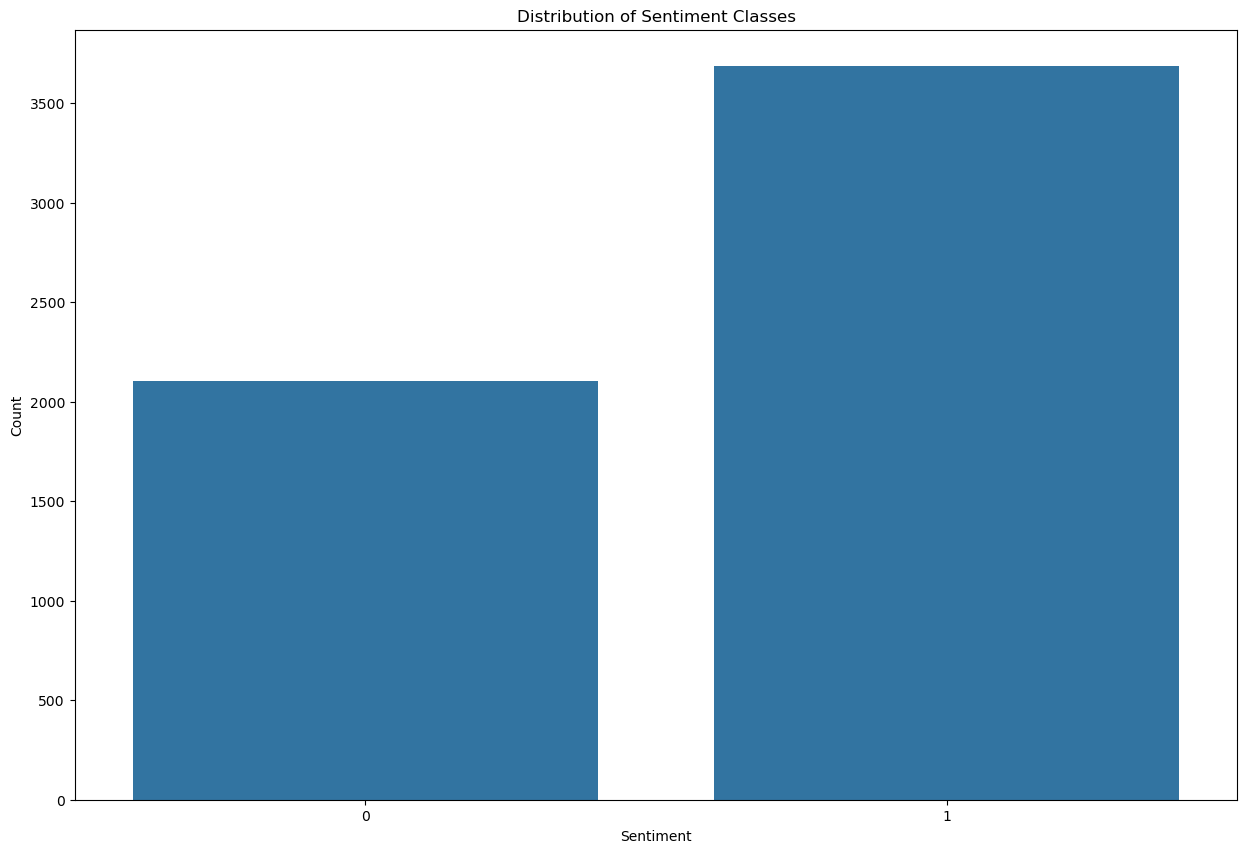

In [117]:
plt.figure(figsize = (15,10))

sns.countplot(x = 'Sentiment', data = stock_df)
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Distribution of Sentiment Classes')

In [118]:
x = stock_df[stock_df['Sentiment']== -1]

x

,Text,Sentiment,Text Without Punctuation,Text without punctuation and stopwords,Text without punctuation and stopwords joined


In [119]:
print(stock_df['Sentiment'].value_counts())


Sentiment
1    3685
0    2106
Name: count, dtype: int64


# PREPARE THE DATA BY TOKENIZING AND PADDING

In [120]:
# Obtain the total words present in the dataset
list_of_words = []

for i in stock_df['Text without punctuation and stopwords']:
    for j in i:
        list_of_words.append(j)


In [121]:
list_of_words

['kickers',
 'watchlist',
 'xide',
 'tit',
 'soq',
 'pnk',
 'cpw',
 'bpz',
 'aj',
 'trade',
 'method',
 'method',
 'see',
 'prev',
 'posts',
 'movie',
 'return',
 'feageed',
 'indicator',
 'trades',
 'awesome',
 'id',
 'afraid',
 'short',
 'amzn',
 'looking',
 'like',
 'nearmonopoly',
 'ebooks',
 'mnta',
 'oi',
 'pgnx',
 'current',
 'downtrend',
 'break',
 'otherwise',
 'shortterm',
 'correction',
 'medterm',
 'downtrend',
 'mondays',
 'relative',
 'weakness',
 'nyx',
 'win',
 'tie',
 'tap',
 'ice',
 'int',
 'bmc',
 'aon',
 'chk',
 'biib',
 'goog',
 'ower',
 'trend',
 'line',
 'channel',
 'test',
 'volume',
 'support',
 'watch',
 'tomorrow',
 'ong',
 'entry',
 'im',
 'assuming',
 'fcx',
 'opens',
 'tomorrow',
 'trigger',
 'buy',
 'still',
 'much',
 'like',
 'setup',
 'really',
 'worries',
 'everyone',
 'expects',
 'market',
 'rally',
 'nowusually',
 'exact',
 'opposite',
 'happens',
 'every',
 'time',
 'shall',
 'see',
 'soon',
 'bac',
 'spx',
 'jpm',
 'gamcos',
 'arry',
 'haverty',
 '

In [122]:
total_of_words = len(list(set(list_of_words)))
total_of_words 

9647

In [123]:
# Obtain the total number of unique words
total_words = len(list(set(list_of_words)))

total_words

9647

In [124]:
# split the data into test and train

X = stock_df['Text without punctuation and stopwords']

y = stock_df['Sentiment']

In [125]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2 )

In [126]:
X_train.shape

(4632,)

In [127]:
X_test.shape

(1159,)

In [128]:
X_train

4815    [benrab, position, ever, payment, ever, trying...
1536               [mrge, flag, break, like, look, added]
3313                                   [cat, short, idea]
5194    [federal, reserve, limited, efforts, revive, t...
4010                                   [ino, perspective]
                              ...                        
2563    [nice, share, amzn, intraday, short, explainat...
3995    [af, min, ok, really, last, one, note, fibs, s...
504          [bac, wait, setup, ooks, like, retest, sure]
4108                                          [shot, cne]
2964    [bac, told, last, peoples, tradenext, entry, h...
Name: Text without punctuation and stopwords, Length: 4632, dtype: object

In [129]:
# Create a tokenizer to tokenize the words and create sequences of tokenized words
tokenizer = Tokenizer(num_words = total_words)
tokenizer.fit_on_texts(X_train)



In [130]:
#training data

training_sequences = tokenizer.texts_to_sequences(X_train)

testing_sequences = tokenizer.texts_to_sequences(X_test)

In [131]:
print("The encoding form of", X_train[1:2], "is", training_sequences[1])

The encoding form of 1536    [mrge, flag, break, like, look, added]
Name: Text without punctuation and stopwords, dtype: object is [3578, 91, 33, 3, 84, 147]


Neural networks need all sequences to be of equal length, so we pad or truncate them.

In [132]:
# Add padding to training and testing

padded_train = pad_sequences(training_sequences, maxlen = 29, padding = 'post', truncating = 'post')
padded_test = pad_sequences(testing_sequences, maxlen = 29, truncating = 'post')

pad_sequences(train_sequences, maxlen=29, padding='post', truncating='post')

train_sequences: list of tokenized and encoded training sentences.

maxlen=29: final desired length of each sequence is 29.

padding='post': if a sequence is shorter than 29, add zeros at the end.

truncating='post': if a sequence is longer than 29, cut from the end.

In [133]:
#Checking for first three samples
padded_train[:3]

array([[3576,   52,  405, 1859,  405,  135, 1241, 1860,  185,  834, 3577,
         749,  310,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0],
       [3578,   91,   33,    3,   84,  147,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0],
       [ 130,    1,  358,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0]])

In [134]:

for i, doc in enumerate(padded_train[:3]):
    print("The padded encoding for document:", i+1," is:", doc)


The padded encoding for document: 1  is: [3576   52  405 1859  405  135 1241 1860  185  834 3577  749  310    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0]
The padded encoding for document: 2  is: [3578   91   33    3   84  147    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0]
The padded encoding for document: 3  is: [130   1 358   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0]


Converting y_train to a 2D categorical representation is typically done when you're working on multi-class or binary classification using deep learning models, especially with Keras or TensorFlow. 

You convert y_train to 2D categorical when:

You use _softmax_ for multiple classes

You're training with categorical_crossentropy

You need label format to match prediction shape

In [135]:
# Convert the data to categorical 2D representation
y_train_cat = to_categorical(y_train, 2)

y_test_cat = to_categorical(y_test)

In [136]:
y_train_cat.shape

(4632, 2)

In [137]:
y_test_cat.shape

(1159, 2)

In [138]:
y_train_cat

array([[1., 0.],
       [0., 1.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [0., 1.]])

# BUILD A CUSTOM-BASED DEEP NEURAL NETWORK TO PERFORM SENTIMENT ANALYSIS

In [139]:
# Sequential Model

model = Sequential()

#embedding layer

model.add(Embedding(total_words, output_dim= 512))

#Bi-directional RNN and LSTM

model.add(LSTM(256))

#Dense layers

model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0,3))
model.add(Dense(2, activation = 'softmax'))
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['acc'])
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [141]:
# train the model

model.fit(padded_train, y_train_cat, batch_size = 32, validation_split = 0.2 , epochs= 2 )

Epoch 1/2
116/116 ━━━━━━━━━━━━━━━━━━━━ 32s 230ms/step - acc: 0.6182 - loss: 0.6671 - val_acc: 0.5674 - val_loss: 0.6010
Epoch 2/2
116/116 ━━━━━━━━━━━━━━━━━━━━ 27s 230ms/step - acc: 0.7683 - loss: 0.4905 - val_acc: 0.7443 - val_loss: 0.5477


# ASSESS TRAINED MODEL PERFORMANCE

In [ ]:
# make prediction
pred = model.predict(padded_test)

In [ ]:
# make prediction
prediction = []
for i in pred:
  prediction.append(np.argmax(i))

In [ ]:
# list containing original values
original = []
for i in y_test_cat:
  original.append(np.argmax(i))

In [ ]:
# acuracy score on text data

from sklearn.metrics import accuracy_score

accuracy = accuracy_score(original, prediction)

accuracy

In [ ]:
# Plot the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(original, prediction)
sns.heatmap(cm, annot = True)